In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
#fake data generation:
observations = 1000

xs = np.random.uniform(-10, 10, (observations, 1))
zs = np.random.uniform(-10, 10, (observations, 1))

generated_inputs = np.column_stack((xs, zs))

noise = np.random.uniform(-1, 1, (observations, 1))

generated_targets = 2*xs - 3*zs + 5 + noise

np.savez("TF_intro", inputs = generated_inputs, targets = generated_targets)

Solving with TensorFlow:

In [3]:
training_data = np.load("TF_intro.npz")

In [4]:
input_size = 2
output_size = 1

model = tf.keras.Sequential([tf.keras.layers.Dense(output_size)])

model.compile(optimizer = "sgd", loss = "mean_squared_error")

model.fit(training_data["inputs"], training_data["targets"], epochs = 100, verbose = 2)

Epoch 1/100
32/32 - 9s - 271ms/step - loss: 27.9324
Epoch 2/100
32/32 - 0s - 3ms/step - loss: 4.4818
Epoch 3/100
32/32 - 0s - 3ms/step - loss: 1.5137
Epoch 4/100
32/32 - 0s - 4ms/step - loss: 0.6473
Epoch 5/100
32/32 - 0s - 3ms/step - loss: 0.4248
Epoch 6/100
32/32 - 0s - 5ms/step - loss: 0.3817
Epoch 7/100
32/32 - 0s - 3ms/step - loss: 0.3554
Epoch 8/100
32/32 - 0s - 5ms/step - loss: 0.3534
Epoch 9/100
32/32 - 0s - 5ms/step - loss: 0.3589
Epoch 10/100
32/32 - 0s - 2ms/step - loss: 0.3514
Epoch 11/100
32/32 - 0s - 5ms/step - loss: 0.3452
Epoch 12/100
32/32 - 0s - 5ms/step - loss: 0.3485
Epoch 13/100
32/32 - 0s - 5ms/step - loss: 0.3471
Epoch 14/100
32/32 - 0s - 3ms/step - loss: 0.3514
Epoch 15/100
32/32 - 0s - 5ms/step - loss: 0.3563
Epoch 16/100
32/32 - 0s - 3ms/step - loss: 0.3513
Epoch 17/100
32/32 - 0s - 4ms/step - loss: 0.3503
Epoch 18/100
32/32 - 0s - 3ms/step - loss: 0.3465
Epoch 19/100
32/32 - 0s - 5ms/step - loss: 0.3511
Epoch 20/100
32/32 - 0s - 2ms/step - loss: 0.3471
Epoch 

Extract the Weights and Bias:

In [5]:
model.layers[0].get_weights()

[array([[ 2.0100777],
        [-3.0138214]], dtype=float32),
 array([4.993697], dtype=float32)]

In [7]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 2.0100777],
       [-3.0138214]], dtype=float32)

In [8]:
bias = model.layers[0].get_weights()[1]
bias

array([4.993697], dtype=float32)

Extract The Outputs:

In [10]:
model.predict_on_batch(training_data["inputs"].round(1))

array([[ 4.57853241e+01],
       [ 1.01112366e+01],
       [ 1.41334629e+01],
       [-6.75606155e+00],
       [-2.08278999e+01],
       [-5.75283527e+00],
       [-4.08246765e+01],
       [-1.38927450e+01],
       [-3.41921959e+01],
       [-7.76705837e+00],
       [ 2.83995743e+01],
       [-1.59998293e+01],
       [-2.46486015e+01],
       [ 1.25225525e+01],
       [-1.63722754e+00],
       [ 2.66901054e+01],
       [ 4.58779621e+00],
       [-6.46374512e+00],
       [ 1.78470573e+01],
       [ 1.75568123e+01],
       [-1.30874186e+01],
       [ 1.27518296e+00],
       [ 2.00638390e+01],
       [-3.65274525e+00],
       [-2.20295448e+01],
       [ 1.67564440e+00],
       [-9.28018761e+00],
       [-1.32961969e+01],
       [-9.37382603e+00],
       [ 1.04227209e+01],
       [-4.38385010e+01],
       [-1.02751217e+01],
       [ 2.15679016e+01],
       [ 3.45294075e+01],
       [ 2.52934113e+01],
       [ 1.50316534e+01],
       [-5.35056019e+00],
       [ 2.76030579e+01],
       [ 2.2

In [11]:
training_data["targets"].round(1)

array([[ 44.8],
       [ 11. ],
       [ 13.3],
       [ -6.9],
       [-20.3],
       [ -6.2],
       [-40.4],
       [-13. ],
       [-34.2],
       [ -8. ],
       [ 28.3],
       [-15. ],
       [-24.9],
       [ 13.1],
       [ -0.8],
       [ 25.7],
       [  4.4],
       [ -6.6],
       [ 17.2],
       [ 17.9],
       [-13.9],
       [  1.6],
       [ 18.9],
       [ -4. ],
       [-21.1],
       [  1. ],
       [ -8.6],
       [-12.5],
       [-10.1],
       [  9.8],
       [-43.1],
       [ -9.9],
       [ 21.7],
       [ 34.6],
       [ 26.1],
       [ 14.9],
       [ -4.7],
       [ 27.6],
       [ 21.8],
       [ 12. ],
       [ 11.8],
       [ -0.9],
       [  9.9],
       [ 20.5],
       [ 21.9],
       [  1.3],
       [ 34. ],
       [  4.1],
       [ 27.6],
       [ 12.2],
       [ 28.3],
       [-20.5],
       [ 33.4],
       [-23.3],
       [ -0.2],
       [-20.8],
       [ 26.1],
       [-13.6],
       [ -9.8],
       [ 37.1],
       [ 10.5],
       [  7.9],
       [

Plotting The Data:

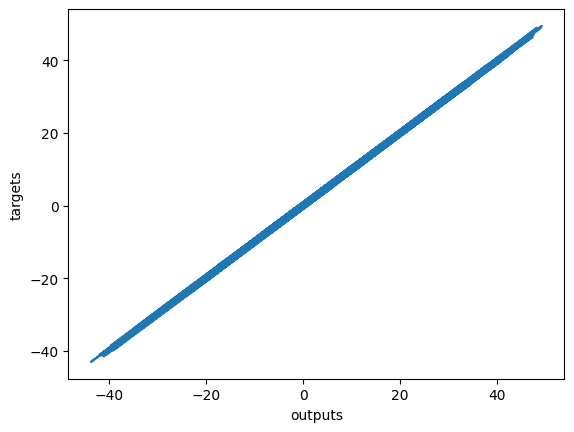

In [12]:
plt.plot(np.squeeze(model.predict_on_batch(training_data["inputs"])), np.squeeze(training_data["targets"]))
plt.xlabel("outputs")
plt.ylabel("targets")
plt.show()